In [10]:
import pickle


with open('/Volumes/LaCie/Autocorr/obj-SpectACF_time_list.pkl', 'rb') as f:
    data = pickle.load(f)

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import statistics 

In [37]:
data[0]['22']['all'].shape

(3, 270, 650)

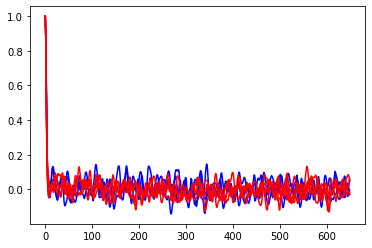

In [207]:
for i in range(data[0]['9']['all'].shape[0]):
    plt.plot(data[0]['9']['all'][i,0,:],color='blue')
for i in range(data[5]['9']['all'].shape[0]):
    plt.plot(data[5]['9']['all'][i,0,:],color='red')

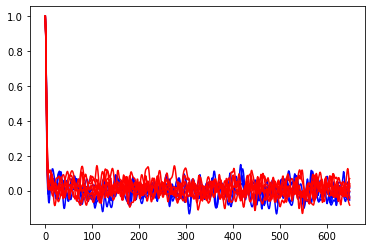

In [205]:
for i in range(data[1]['9']['all'].shape[0]):
    plt.plot(data[1]['9']['all'][i,0,:],color='blue')
for i in range(data[6]['9']['all'].shape[0]):    
    plt.plot(data[6]['9']['all'][i,0,:],color='red')
    

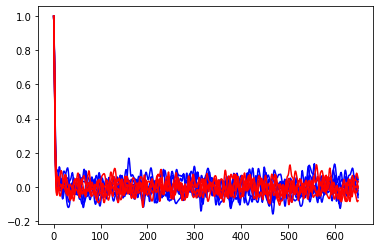

In [208]:
for i in range(data[2]['9']['all'].shape[0]):
    plt.plot(data[2]['9']['all'][i,0,:],color='blue')
for i in range(data[7]['9']['all'].shape[0]):    
    plt.plot(data[7]['9']['all'][i,0,:],color='red')

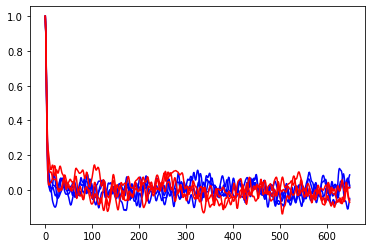

In [210]:
for i in range(data[3]['9']['all'].shape[0]):
    plt.plot(data[3]['9']['all'][i,0,:],color='blue')
for i in range(data[8]['9']['all'].shape[0]):    
    plt.plot(data[8]['9']['all'][i,0,:],color='red')

TypeError: mean() takes 1 positional argument but 3 were given

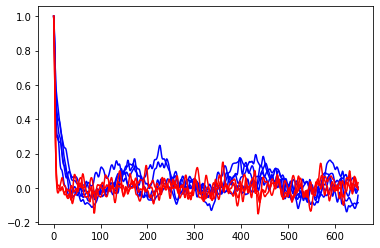

In [221]:
for i in range(data[4]['9']['all'].shape[0]):
    plt.plot(data[4]['9']['all'][i,0,:],color='blue')
for i in range(data[9]['9']['all'].shape[0]):    
    plt.plot(data[9]['9']['all'][i,0,:],color='red')
    
for i in range(data[9]['9']['all'].shape[0]):
    for j in range(data[9]['9']['all'].shape[2]):
        data[9]['9']['all'][i,0,j]  
    
statistics.mean(data[4]['9']['all'][0,0,0], data[4]['9']['all'][1,0,0], data[4]['9']['all'][2,0,0])
data[4]['9']['all'][0,0,:]

Frequency Bands:
[(0.1, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 14), (14, 18), (18, 22), (22, 26), (26, 30), (30, 34), (34, 38), (38, 42), (42, 46), (46, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 110), (110, 130), (130, 150), (150, 170)]

List-subject index:
[s2_audi_spectrum,s4_audi_spectrum,s5_audi_spectrum,s7_audi_spectrum,s10_audi_spectrum,s2_v_spectrum,s4_v_spectrum, s5_v_spectrum,s7_v_spectrum,s10_v_spectrum,s8_v_spectrum,s13_v_spectrum]


In [40]:
from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    """
    3 parameter exponential function, amplitude a, intrinsic decay b and offset c
    """
    return (a * np.exp(-x/b) + c)


def find_decayval_exp(autocorr_array, threshold = 0.1):
    """
    Find the time for each autocorr_array row that drops to the certain threshold.
    """
    decays={}
    for i in range(autocorr_array.shape[0]):
        decays[str(i)] = {}
        x = np.arange(0,autocorr_array.shape[1])
        y = autocorr_array[i,:]
        popt, pcov = curve_fit(exponential_func, x, y, maxfev=3000) # Fit curve
        y_fit = exponential_func(x, *popt)
        
        x_loc = np.interp(threshold, y_fit[::-1], x[::-1])
        
        decays[str(i)]['decay_time']=x_loc
        decays[str(i)]['parms']=popt
    
    return(decays)
        



In [59]:
def generate_chsnames(chs_prenames, chs_numbers):
    """
    generate channel names so that you don't have to type by yourself.
    e.g print(generate_chsnames(['LSTGD',"RAHCD"],[[9,10,11,12,13,14],list(range(5,9))]))
    [['LSTGD9', 'LSTGD10', 'LSTGD11', 'LSTGD12', 'LSTGD13', 'LSTGD14'], ['RAHCD5', 'RAHCD6', 'RAHCD7', 'RAHCD8']]
    """
    return_lists = []
    for i in range(len(chs_prenames)):
        chs_list = []
        for nums in chs_numbers[i]:
            chs_list.append(chs_prenames[i]+str(nums))
        return_lists.append(chs_list)
    return(return_lists)


In [190]:
out0_9 = find_decayval_exp(data[0]['9']['all'][0,:,:],0.2)
out0_9_b = []
out5_9 = find_decayval_exp(data[5]['9']['all'][0,:,:],0.2)
out5_9_b = []

In [191]:
for i in range(0,269):
    out0_9_b.append(list(out0_9.values())[i]['parms'][1])
    out5_9_b.append(list(out5_9.values())[i]['parms'][1])
   

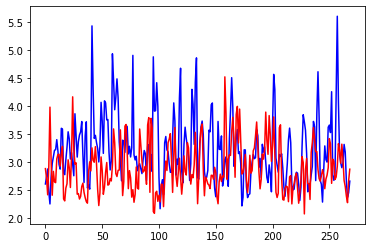

In [192]:
plt.plot(out0_9_b,color='blue')
plt.plot(out5_9_b,color='red')

In [595]:
audio=np.array([1,2,3,4])
vmPFC=np.array([2,3,1,3])
audio>vmPFC


array([False, False,  True,  True])

In [373]:
def audio_vmPFC_compare(audio, vmPFC):

    return_lists = []
    for i in range(len(audio)):
        if audio[i] < vmPFC[i]:
            return_lists.append(1)
        else:
            return_lists.append(-1)
    return(return_lists)


In [586]:
def frequency_band_extractor(subject,frequency_band):
    subject_dict={}
    for i in range(data[subject][frequency_band]['all'].shape[0]):
        subject_dict[i]=[]
        for j in range(data[subject][frequency_band]['all'].shape[1]):
            subject_dict[i].append(list(find_decayval_exp(data[subject][frequency_band]['all'][i,:,:],0.15).values())[j]['parms'][1])
    return(subject_dict)   
    

In [625]:
def form_channels_into_dataframe(subject):
    #Form channels into one dataframe
    subject_channel_df = {}
    for i in range(len(subject)):
        subject_channel_df[i] = pd.DataFrame()
        for j in range(len(subject[i])):
            subject_channel_df[i][j] = subject1[i][j]
    return(subject_channel_df)
            
    

In [642]:
def pca_channels(subject_channel_df):
    """
    Using PCA to reduce the channel dimension to 3
    """
    subject_pca = {}
    for i in range(len(subject_channel_df)):
        subject_pca[i] = StandardScaler().fit_transform(subject_channel_df[i])
        pca = PCA(n_components=3)
        subject_pca[i] = pca.fit_transform(subject_pca[i])
        subject_pca[i] = pd.DataFrame(data = subject_pca[i]
                 , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
    return(subject_pca)    


In [597]:
subject0 = {}
for i in range(len(data[0])):
    subject0[i]=frequency_band_extractor(subject=0,frequency_band=str(i))

/Users/oliverliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [599]:
subject1 = {}
for i in range(len(data[1])):
    subject1[i]=frequency_band_extractor(subject=1,frequency_band=str(i))

/Users/oliverliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/oliverliu/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [641]:
subject1_channel_df = form_channels_into_dataframe(subject1)

In [643]:
subject_pca1 = pca_channels(subject1_channel_df)
subject_pca1

{0:      principal component 1  principal component 2  principal component 3
 0                 0.311798              -0.136950              -0.037948
 1                 0.423926              -0.169433              -0.088752
 2                 0.851055              -0.235899              -0.310365
 3                 0.193119              -0.013344              -0.026703
 4                 0.290877               0.016120              -0.098327
 ..                     ...                    ...                    ...
 265               0.051760               0.210987              -0.049885
 266               1.394320              -0.414784              -0.546914
 267               4.603800              -2.006385              -1.689507
 268               0.226259              -0.029394              -0.038697
 269              -0.063155               0.025280               0.106554
 
 [270 rows x 3 columns],
 1:      principal component 1  principal component 2  principal component 3
 0   

In [646]:
subject_pca1[0].loc[:,'principal component 1'].values

array([ 3.11798146e-01,  4.23926185e-01,  8.51055041e-01,  1.93119221e-01,
        2.90877427e-01,  1.48483534e-01,  3.89507559e-02,  1.72504576e-03,
        2.19526267e-02,  2.90264527e-02, -5.05599209e-01, -2.33848216e-01,
        2.35002710e-02,  1.22109867e-01,  1.03091161e-01, -5.74125629e-02,
        1.70995368e-02, -7.62538138e-03,  1.43867195e-01,  8.48985876e-02,
       -5.08082956e-01, -1.03439493e-01,  4.20433558e-02, -1.45501232e-01,
       -5.02144332e-02, -5.58597797e-02, -4.10981397e-03, -1.60575735e+00,
       -2.68744997e-02,  2.87177030e+00,  3.00957095e-01, -2.88393491e-01,
       -2.04266252e-01,  4.54788626e-01, -4.77981069e-01, -2.88892290e-01,
        4.57816894e-02,  3.16497994e-01,  2.09296536e-01,  1.08194398e-01,
        1.47577662e-01, -1.27904659e+00,  4.04669213e+00,  7.91927149e-01,
        1.00291049e-01,  4.66156327e-01,  2.24672711e-01,  3.84098265e-04,
        5.05963800e-01,  1.65241994e-02,  5.62577375e-02,  8.03373687e+00,
        3.99153016e-01,  

In [647]:
def subject_compare(subject_pca_audio,subject_pca_vmpfc):
    subject_compare_output = {}
    subject_channel_compare = {}
    for i in range(len(subject_pca_audio)):
        subject_compare_output[i][1] = audio_vmPFC_compare(subject_pca_audio[0].loc[:,'principal component 1'].values, subject_pca_vmpfc[0].loc[:,'principal component 1'].values) 
        subject_compare_output[i][2] = audio_vmPFC_compare(subject_pca_audio[0].loc[:,'principal component 1'].values, subject_pca_vmpfc[0].loc[:,'principal component 2'].values)
        subject_compare_output[i][3] = audio_vmPFC_compare(subject_pca_audio[0].loc[:,'principal component 1'].values, subject_pca_vmpfc[0].loc[:,'principal component 3'].values)
        subject_compare_output[i][4] = audio_vmPFC_compare(subject_pca_audio[0].loc[:,'principal component 2'].values, subject_pca_vmpfc[0].loc[:,'principal component 1'].values)
        subject_compare_output[i][5] = audio_vmPFC_compare(subject_pca_audio[0].loc[:,'principal component 2'].values, subject_pca_vmpfc[0].loc[:,'principal component 2'].values)
        subject_compare_output[i][6] = audio_vmPFC_compare(subject_pca_audio[0].loc[:,'principal component 2'].values, subject_pca_vmpfc[0].loc[:,'principal component 3'].values)
        subject_compare_output[i][7] = audio_vmPFC_compare(subject_pca_audio[0].loc[:,'principal component 3'].values, subject_pca_vmpfc[0].loc[:,'principal component 1'].values)
        subject_compare_output[i][8] = audio_vmPFC_compare(subject_pca_audio[0].loc[:,'principal component 3'].values, subject_pca_vmpfc[0].loc[:,'principal component 2'].values)
        subject_compare_output[i][9] = audio_vmPFC_compare(subject_pca_audio[0].loc[:,'principal component 3'].values, subject_pca_vmpfc[0].loc[:,'principal component 3'].values)
        for j in range(len(subject_compare_output[i][1])):
            if subject_compare_output[i][1][j] + subject_compare_output[i][2][j] + subject_compare_output[i][3][j]+ subject_compare_output[i][4][j]+ subject_compare_output[i][5][j]+ subject_compare_output[i][6][j]+ subject_compare_output[i][7][j]+ subject_compare_output[i][8][j]+ subject_compare_output[i][9][j] >= 3:
                subject_channel_compare[i].append(1)
            elif subject_compare_output[i][1][j] + subject_compare_output[i][2][j] + subject_compare_output[i][3][j]+ subject_compare_output[i][4][j]+ subject_compare_output[i][5][j]+ subject_compare_output[i][6][j]+ subject_compare_output[i][7][j]+ subject_compare_output[i][8][j]+ subject_compare_output[i][9][j] <= -3:
                subject_channel_compare[i].append(-1)
            else:
                subject_channel_compare[i].append(0)
    return(subject_channel_compare)
             

(3, 270, 650)
(4, 270, 650)
(3, 270)
(4, 270)


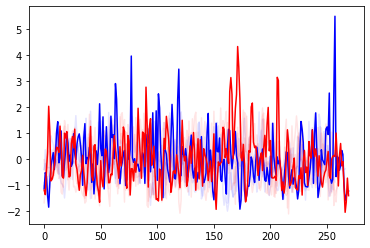

In [539]:
print(data[0]['9']['all'].shape)
print(data[5]['9']['all'].shape)

for i in range(data[0]['9']['all'].shape[0]):
    out0_9[i] = find_decayval_exp(data[0]['9']['all'][i,:,:],0.15)
for i in range(data[5]['9']['all'].shape[0]):    
    out5_9[i] = find_decayval_exp(data[5]['9']['all'][i,:,:],0.15)

out0_9_0_b = []
out0_9_1_b = []
out0_9_2_b = []
out5_9_0_b = []
out5_9_1_b = []
out5_9_2_b = []
out5_9_3_b = []
for j in range(data[0]['9']['all'].shape[1]):
    out0_9_0_b.append(list(out0_9[0].values())[j]['parms'][1])
    out0_9_1_b.append(list(out0_9[1].values())[j]['parms'][1])
    out0_9_2_b.append(list(out0_9[2].values())[j]['parms'][1])
    out5_9_0_b.append(list(out5_9[0].values())[j]['parms'][1])
    out5_9_1_b.append(list(out5_9[1].values())[j]['parms'][1])
    out5_9_2_b.append(list(out5_9[2].values())[j]['parms'][1])
    out5_9_3_b.append(list(out5_9[3].values())[j]['parms'][1])

ou1 = np.concatenate([np.array(out0_9_0_b).reshape(1,-1),np.array(out0_9_1_b).reshape(1,-1),np.array(out0_9_2_b).reshape(1,-1)],axis=0)
ou2 = np.concatenate([np.array(out5_9_0_b).reshape(1,-1),np.array(out5_9_1_b).reshape(1,-1),np.array(out5_9_2_b).reshape(1,-1),np.array(out5_9_3_b).reshape(1,-1)],axis=0)

print(ou1.shape)
print(ou2.shape)

std1=([i for i in out0_9_0_b if i < statistics.mean(out0_9_0_b)+2*statistics.stdev(out0_9_0_b)]-statistics.mean(out0_9_0_b))/statistics.stdev(out0_9_0_b)
std2=([i for i in out0_9_1_b if i < statistics.mean(out0_9_1_b)+2*statistics.stdev(out0_9_1_b)]-statistics.mean(out0_9_1_b))/statistics.stdev(out0_9_1_b)
std3=([i for i in out0_9_2_b if i < statistics.mean(out0_9_2_b)+2*statistics.stdev(out0_9_2_b)]-statistics.mean(out0_9_2_b))/statistics.stdev(out0_9_2_b)
std4=([i for i in out5_9_0_b if i < statistics.mean(out5_9_0_b)+2*statistics.stdev(out5_9_0_b)]-statistics.mean(out5_9_0_b))/statistics.stdev(out5_9_0_b)
std5=([i for i in out5_9_1_b if i < statistics.mean(out5_9_1_b)+2*statistics.stdev(out5_9_1_b)]-statistics.mean(out5_9_1_b))/statistics.stdev(out5_9_1_b)
std6=([i for i in out5_9_2_b if i < statistics.mean(out5_9_2_b)+2*statistics.stdev(out5_9_2_b)]-statistics.mean(out5_9_2_b))/statistics.stdev(out5_9_2_b)
std7=([i for i in out5_9_3_b if i < statistics.mean(out5_9_3_b)+2*statistics.stdev(out5_9_3_b)]-statistics.mean(out5_9_3_b))/statistics.stdev(out5_9_3_b)

std8=(np.median(ou1,axis=0)-statistics.mean(np.median(ou1,axis=0)))/statistics.stdev(np.median(ou1,axis=0))
std9=(np.median(ou2,axis=0)-statistics.mean(np.median(ou2,axis=0)))/statistics.stdev(np.median(ou2,axis=0))




plt.plot(std1,color='blue',alpha=0.1)
plt.plot(std2,color='blue',alpha=0.1)
plt.plot(std3,color='blue',alpha=0.1)
plt.plot(std4,color='red',alpha=0.1)
plt.plot(std5,color='red',alpha=0.1)
plt.plot(std6,color='red',alpha=0.1)
plt.plot(std7,color='red',alpha=0.1)
plt.plot(std8,color = 'blue')
plt.plot(std9,color = 'red')
#plt.ylim(0,10)


subject1_compare = audio_vmPFC_compare(std8, std9)

In [441]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
#Form channels into one dataframe
Subject1_audio = pd.DataFrame({'channel1': out0_9_0_b, 'channel2': out0_9_1_b,'channel3': out0_9_2_b}, columns=['channel1', 'channel2','channel3'])
Subject1_vmpfc = pd.DataFrame({'channel1': out5_9_0_b, 'channel2': out5_9_1_b,'channel3': out5_9_2_b,'channel4': out5_9_3_b}, columns=['channel1', 'channel2','channel3','channel4'])

#Standardize the channels
Subject1_audio = StandardScaler().fit_transform(Subject1_audio)
Subject1_vmpfc = StandardScaler().fit_transform(Subject1_vmpfc)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Subject1_audio_components = pca.fit_transform(Subject1_audio)
principalDf_Subject1_audio = pd.DataFrame(data = Subject1_audio_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)

Subject1_vmpfc_components = pca.fit_transform(Subject1_vmpfc)
principalDf_Subject1_vmpfc = pd.DataFrame(data = Subject1_vmpfc_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)


[0.43858168 0.31532598 0.24609234]
[0.46098683 0.20617327 0.19331776]


In [492]:
s1pc_compare1 = audio_vmPFC_compare(Subject1_audio[:,0], principalDf_Subject1_vmpfc.loc[:,'principal component 1'].values)
s1pc_compare2 = audio_vmPFC_compare(Subject1_audio[:,0], principalDf_Subject1_vmpfc.loc[:,'principal component 2'].values)
s1pc_compare3 = audio_vmPFC_compare(Subject1_audio[:,0], principalDf_Subject1_vmpfc.loc[:,'principal component 3'].values)
s1pc_compare4 = audio_vmPFC_compare(Subject1_audio[:,1], principalDf_Subject1_vmpfc.loc[:,'principal component 1'].values)
s1pc_compare5 = audio_vmPFC_compare(Subject1_audio[:,1], principalDf_Subject1_vmpfc.loc[:,'principal component 2'].values)
s1pc_compare6 = audio_vmPFC_compare(Subject1_audio[:,1], principalDf_Subject1_vmpfc.loc[:,'principal component 3'].values)
s1pc_compare7 = audio_vmPFC_compare(Subject1_audio[:,2], principalDf_Subject1_vmpfc.loc[:,'principal component 1'].values)
s1pc_compare8 = audio_vmPFC_compare(Subject1_audio[:,2], principalDf_Subject1_vmpfc.loc[:,'principal component 2'].values)
s1pc_compare9 = audio_vmPFC_compare(Subject1_audio[:,2], principalDf_Subject1_vmpfc.loc[:,'principal component 3'].values)


s1all_compare = []
for i in range(len(s1pc_compare1)):
    if s1pc_compare1[i] + s1pc_compare2[i] + s1pc_compare3[i]+ s1pc_compare4[i]+ s1pc_compare5[i]+ s1pc_compare6[i]+ s1pc_compare7[i]+ s1pc_compare8[i]+ s1pc_compare9[i] >= 3:
        s1all_compare.append(1)
    elif s1pc_compare1[i] + s1pc_compare2[i] + s1pc_compare3[i]+ s1pc_compare4[i]+ s1pc_compare5[i]+ s1pc_compare6[i]+ s1pc_compare7[i]+ s1pc_compare8[i]+ s1pc_compare9[i] <= -3:
        s1all_compare.append(-1)
    else:
        s1all_compare.append(0)
print(s1all_compare)       


[-1, -1, 1, 1, 1, 1, 0, -1, -1, 1, 0, 0, 0, 0, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 0, 0, -1, 0, 0, -1, -1, -1, -1, -1, 1, 1, 0, 0, -1, -1, 0, 1, -1, -1, 0, 1, 0, 0, 0, -1, 0, 0, -1, -1, -1, 1, 1, 0, -1, -1, -1, -1, 1, 1, 0, -1, -1, 0, 1, 1, 1, 0, -1, -1, 0, 1, -1, -1, 1, 0, 0, 1, 0, -1, 0, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 0, 1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 1, -1, -1, -1, 0, 1, 1, 0, 0, -1, -1, 1, 1, 0, 0, 0, 1, 1, 1, 1, -1, -1, -1, 0, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 0, 1, 1, 1, 0, -1, 0, 1, 1, 0, -1, 0, 1, 1, 1, 1, 1, -1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, -1, 0, 0, -1, -1, -1, 0, -1, 0, 1, 0, 1, 1, 1, 1, -1, -1, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, 0, 1, 1, 1, 1, 0, -1, 0, 0, 1, 1, 1, 1, -1, -1, -1, 0, 1, 0, 1, 1, 1, 1, -1, 0, 1, -1, 0, 0, 1, 1, 1, 0, 0, 0, -1, -1, 0, -1, -1, -1, 1, 1, -1, -1, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, -1, 0]


In [270]:
np.array(out1_9_0_b).shape
print(data[1]['9']['all'].shape)
print(data[6]['9']['all'].shape)

for i in range(data[1]['9']['all'].shape[0]):
    out1_9[i] = find_decayval_exp(data[1]['9']['all'][i,:,:],0.15)
    out1_9_b[i] = []
    for j in range(data[1]['9']['all'].shape[1]):
        out1_9_b[i].append(list(out1_9[i].values())[j]['parms'][1])
for i in range(data[6]['9']['all'].shape[0]):
    out6_9[i] = find_decayval_exp(data[6]['9']['all'][i,:,:],0.15)
    out6_9_b[i] = []
    for j in range(data[6]['9']['all'].shape[1]):
        out6_9_b[i].append(list(out6_9[i].values())[j]['parms'][1])
#np.array(out1_9_b[3]).reshape(1,-1)

(4, 270, 650)
(7, 270, 650)


(4, 270, 650)
(7, 270, 650)
(4, 270)
(7, 270)


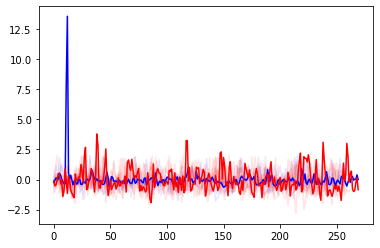

In [454]:
print(data[1]['9']['all'].shape)
print(data[6]['9']['all'].shape)

for i in range(data[1]['9']['all'].shape[0]):
    out1_9[i] = find_decayval_exp(data[1]['9']['all'][i,:,:],0.15)
    out1_9_b[i] = []
    for j in range(data[1]['9']['all'].shape[1]):
        out1_9_b[i].append(list(out1_9[i].values())[j]['parms'][1])
for i in range(data[6]['9']['all'].shape[0]):
    out6_9[i] = find_decayval_exp(data[6]['9']['all'][i,:,:],0.15)
    out6_9_b[i] = []
    for j in range(data[6]['9']['all'].shape[1]):
        out6_9_b[i].append(list(out6_9[i].values())[j]['parms'][1])


ou1 = np.concatenate([np.array(out1_9_b[0]).reshape(1,-1),np.array(out1_9_b[1]).reshape(1,-1),np.array(out1_9_b[2]).reshape(1,-1),np.array(out1_9_b[3]).reshape(1,-1)],axis=0)
ou2 = np.concatenate([np.array(out6_9_b[0]).reshape(1,-1),np.array(out6_9_b[1]).reshape(1,-1),np.array(out6_9_b[2]).reshape(1,-1),np.array(out6_9_b[3]).reshape(1,-1),np.array(out6_9_b[4]).reshape(1,-1),np.array(out6_9_b[5]).reshape(1,-1),np.array(out6_9_b[6]).reshape(1,-1)],axis=0)

print(ou1.shape)
print(ou2.shape)


std1=([i for i in out1_9_b[0] if i < statistics.mean(out1_9_b[0])+2*statistics.stdev(out1_9_b[0])]-statistics.mean(out1_9_b[0]))/statistics.stdev(out1_9_b[0])
std2=([i for i in out1_9_b[1] if i < statistics.mean(out1_9_b[1])+2*statistics.stdev(out1_9_b[1])]-statistics.mean(out1_9_b[1]))/statistics.stdev(out1_9_b[1])
std3=([i for i in out1_9_b[2] if i < statistics.mean(out1_9_b[2])+2*statistics.stdev(out1_9_b[2])]-statistics.mean(out1_9_b[2]))/statistics.stdev(out1_9_b[2])
std4=([i for i in out1_9_b[3] if i < statistics.mean(out1_9_b[3])+2*statistics.stdev(out1_9_b[3])]-statistics.mean(out1_9_b[3]))/statistics.stdev(out1_9_b[3])
std5=([i for i in out6_9_b[0] if i < statistics.mean(out6_9_b[0])+2*statistics.stdev(out6_9_b[0])]-statistics.mean(out6_9_b[0]))/statistics.stdev(out6_9_b[0])
std6=([i for i in out6_9_b[1] if i < statistics.mean(out6_9_b[1])+2*statistics.stdev(out6_9_b[1])]-statistics.mean(out6_9_b[1]))/statistics.stdev(out6_9_b[1])
std7=([i for i in out6_9_b[2] if i < statistics.mean(out6_9_b[2])+2*statistics.stdev(out6_9_b[2])]-statistics.mean(out6_9_b[2]))/statistics.stdev(out6_9_b[2])
std8=([i for i in out6_9_b[3] if i < statistics.mean(out6_9_b[3])+2*statistics.stdev(out6_9_b[3])]-statistics.mean(out6_9_b[3]))/statistics.stdev(out6_9_b[3])
std9=([i for i in out6_9_b[4] if i < statistics.mean(out6_9_b[4])+2*statistics.stdev(out6_9_b[4])]-statistics.mean(out6_9_b[4]))/statistics.stdev(out6_9_b[4])
std10=([i for i in out6_9_b[5] if i < statistics.mean(out6_9_b[5])+2*statistics.stdev(out6_9_b[5])]-statistics.mean(out6_9_b[5]))/statistics.stdev(out6_9_b[5])
std11=([i for i in out6_9_b[6] if i < statistics.mean(out6_9_b[6])+2*statistics.stdev(out6_9_b[6])]-statistics.mean(out6_9_b[6]))/statistics.stdev(out6_9_b[6])
std12=(np.median(ou1,axis=0)-statistics.mean(np.median(ou1,axis=0)))/statistics.stdev(np.median(ou1,axis=0))
std13=(np.median(ou2,axis=0)-statistics.mean(np.median(ou2,axis=0)))/statistics.stdev(np.median(ou2,axis=0))



plt.plot(std1,color='blue',alpha=0.1)
plt.plot(std2,color='blue',alpha=0.1)
plt.plot(std3,color='blue',alpha=0.1)
plt.plot(std4,color='blue',alpha=0.1)
plt.plot(std5,color='red',alpha=0.1)
plt.plot(std6,color='red',alpha=0.1)
plt.plot(std7,color='red',alpha=0.1)
plt.plot(std8,color='red',alpha=0.1)
plt.plot(std9,color='red',alpha=0.1)
plt.plot(std10,color='red',alpha=0.1)
plt.plot(std11,color='red',alpha=0.1)
plt.plot(std12,color = 'blue')
plt.plot(std13,color = 'red')

#plt.ylim(0,10)


subject2_compare = audio_vmPFC_compare(std12, std13)

In [491]:
#Form channels into one dataframe
Subject2_audio = pd.DataFrame({'channel1': out1_9_b[0], 'channel2': out1_9_b[1],'channel3': out1_9_b[2],'channel4': out1_9_b[3]}, columns=['channel1', 'channel2','channel3','channel4'])
Subject2_vmpfc = pd.DataFrame({'channel1': out6_9_b[0], 'channel2': out6_9_b[1],'channel3': out6_9_b[2],'channel4': out6_9_b[3],'channel5': out6_9_b[4],'channel6': out6_9_b[5],'channel7': out6_9_b[6]}, columns=['channel1', 'channel2','channel3','channel4','channel5','channel6','channel7'])

#Standardize the channels
Subject2_audio = StandardScaler().fit_transform(Subject2_audio)
Subject2_vmpfc = StandardScaler().fit_transform(Subject2_vmpfc)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Subject2_audio_components = pca.fit_transform(Subject2_audio)
principalDf_Subject2_audio = pd.DataFrame(data = Subject2_audio_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)

Subject2_vmpfc_components = pca.fit_transform(Subject2_vmpfc)
principalDf_Subject2_vmpfc = pd.DataFrame(data = Subject2_vmpfc_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)


s2pc_compare1 = audio_vmPFC_compare(principalDf_Subject2_audio.loc[:,'principal component 1'].values, principalDf_Subject2_vmpfc.loc[:,'principal component 1'].values)
s2pc_compare2 = audio_vmPFC_compare(principalDf_Subject2_audio.loc[:,'principal component 1'].values, principalDf_Subject2_vmpfc.loc[:,'principal component 2'].values)
s2pc_compare3 = audio_vmPFC_compare(principalDf_Subject2_audio.loc[:,'principal component 1'].values, principalDf_Subject2_vmpfc.loc[:,'principal component 3'].values)
s2pc_compare4 = audio_vmPFC_compare(principalDf_Subject2_audio.loc[:,'principal component 2'].values, principalDf_Subject2_vmpfc.loc[:,'principal component 1'].values)
s2pc_compare5 = audio_vmPFC_compare(principalDf_Subject2_audio.loc[:,'principal component 2'].values, principalDf_Subject2_vmpfc.loc[:,'principal component 2'].values)
s2pc_compare6 = audio_vmPFC_compare(principalDf_Subject2_audio.loc[:,'principal component 2'].values, principalDf_Subject2_vmpfc.loc[:,'principal component 3'].values)
s2pc_compare7 = audio_vmPFC_compare(principalDf_Subject2_audio.loc[:,'principal component 3'].values, principalDf_Subject2_vmpfc.loc[:,'principal component 1'].values)
s2pc_compare8 = audio_vmPFC_compare(principalDf_Subject2_audio.loc[:,'principal component 3'].values, principalDf_Subject2_vmpfc.loc[:,'principal component 2'].values)
s2pc_compare9 = audio_vmPFC_compare(principalDf_Subject2_audio.loc[:,'principal component 3'].values, principalDf_Subject2_vmpfc.loc[:,'principal component 3'].values)


s2all_compare = []
for i in range(len(s2pc_compare1)):
    if s2pc_compare1[i] + s2pc_compare2[i] + s2pc_compare3[i]+ s2pc_compare4[i]+ s2pc_compare5[i]+ s2pc_compare6[i]+ s2pc_compare7[i]+ s2pc_compare8[i]+ s2pc_compare9[i] >= 3:
        s2all_compare.append(1)
    elif s2pc_compare1[i] + s2pc_compare2[i] + s2pc_compare3[i]+ s2pc_compare4[i]+ s2pc_compare5[i]+ s2pc_compare6[i]+ s2pc_compare7[i]+ s2pc_compare8[i]+ s2pc_compare9[i] <= -3:
        s2all_compare.append(-1)
    else:
        s2all_compare.append(0)
print(s2all_compare)  


[0.40202794 0.25144503 0.21384277]
[0.35004728 0.15159707 0.13444967]
[1, 0, -1, 1, 1, -1, -1, -1, 0, 1, 1, 1, 1, 0, -1, -1, -1, -1, -1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 0, 1, 0, 1, 0, -1, 1, 1, 1, 0, 1, 1, 1, -1, 1, 1, 0, -1, -1, -1, 0, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 0, 1, 1, 0, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 0, 1, -1, 0, 0, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, 1, -1, -1, -1, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, -1, 1, 1, -1, 0, 0, 1, 0, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, 0, 0, 0, -1, -1, 0, 1, 1, 1, -1, 0, 1, 1, 1, 1, 0, 0, -1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 0, 1, 1, 0, 0, 0, -1, -1, 1, 1, -1, -1, 0, 0, -1, 1, 1, 0, 1, 1, 1, 1, 1, -1, -1, -1, 0, -1, -1, -1, 1, 1, 0, 0, 0, 0, -1, 0, 1, 0, -1, -1, 0, 0, 1, 1, 1, -1, -1, 0, -1, -1, 1, 0, -1, 0, -1, 0, 1, 1, 1, 1, 0, 0, -1, 0, -1, -1, -1, 0, 0, 0, -1, 0, -1, -1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, -1, 1, 0, -1]


(7, 270, 650)
(5, 270, 650)
(7, 270)
(5, 270)


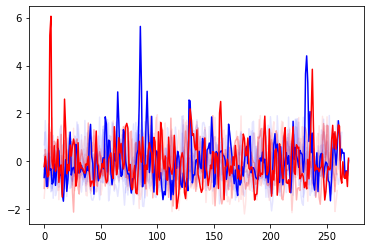

In [377]:
print(data[2]['9']['all'].shape)
print(data[7]['9']['all'].shape)

for i in range(data[2]['9']['all'].shape[0]):
    out2_9[i] = find_decayval_exp(data[2]['9']['all'][i,:,:],0.15)
    out2_9_b[i] = []
    for j in range(data[2]['9']['all'].shape[1]):
        out2_9_b[i].append(list(out2_9[i].values())[j]['parms'][1])
for i in range(data[7]['9']['all'].shape[0]):
    out7_9[i] = find_decayval_exp(data[7]['9']['all'][i,:,:],0.15)
    out7_9_b[i] = []
    for j in range(data[7]['9']['all'].shape[1]):
        out7_9_b[i].append(list(out7_9[i].values())[j]['parms'][1])


ou2 = np.concatenate([np.array(out7_9_b[0]).reshape(1,-1),np.array(out7_9_b[1]).reshape(1,-1),np.array(out7_9_b[2]).reshape(1,-1),np.array(out7_9_b[3]).reshape(1,-1),np.array(out7_9_b[4]).reshape(1,-1)],axis=0)
ou1 = np.concatenate([np.array(out2_9_b[0]).reshape(1,-1),np.array(out2_9_b[1]).reshape(1,-1),np.array(out2_9_b[2]).reshape(1,-1),np.array(out2_9_b[3]).reshape(1,-1),np.array(out2_9_b[4]).reshape(1,-1),np.array(out2_9_b[5]).reshape(1,-1),np.array(out2_9_b[6]).reshape(1,-1)],axis=0)

print(ou1.shape)
print(ou2.shape)

std1=([i for i in out2_9_b[1] if i < statistics.mean(out2_9_b[1])+2*statistics.stdev(out2_9_b[1])]-statistics.mean(out2_9_b[1]))/statistics.stdev(out2_9_b[1])
std2=([i for i in out2_9_b[2] if i < statistics.mean(out2_9_b[2])+2*statistics.stdev(out2_9_b[2])]-statistics.mean(out2_9_b[2]))/statistics.stdev(out2_9_b[2])
std3=([i for i in out2_9_b[3] if i < statistics.mean(out2_9_b[3])+2*statistics.stdev(out2_9_b[3])]-statistics.mean(out2_9_b[3]))/statistics.stdev(out2_9_b[3])
std4=([i for i in out2_9_b[4] if i < statistics.mean(out2_9_b[4])+2*statistics.stdev(out2_9_b[4])]-statistics.mean(out2_9_b[4]))/statistics.stdev(out2_9_b[4])
std5=([i for i in out2_9_b[5] if i < statistics.mean(out2_9_b[5])+2*statistics.stdev(out2_9_b[5])]-statistics.mean(out2_9_b[5]))/statistics.stdev(out2_9_b[5])
std6=([i for i in out2_9_b[6] if i < statistics.mean(out2_9_b[6])+2*statistics.stdev(out2_9_b[6])]-statistics.mean(out2_9_b[6]))/statistics.stdev(out2_9_b[6])
std7=([i for i in out7_9_b[0] if i < statistics.mean(out7_9_b[0])+2*statistics.stdev(out7_9_b[0])]-statistics.mean(out7_9_b[0]))/statistics.stdev(out7_9_b[0])
std8=([i for i in out7_9_b[1] if i < statistics.mean(out7_9_b[1])+2*statistics.stdev(out7_9_b[1])]-statistics.mean(out7_9_b[1]))/statistics.stdev(out7_9_b[1])
std9=([i for i in out7_9_b[2] if i < statistics.mean(out7_9_b[2])+2*statistics.stdev(out7_9_b[2])]-statistics.mean(out7_9_b[2]))/statistics.stdev(out7_9_b[2])
std10=([i for i in out7_9_b[3] if i < statistics.mean(out7_9_b[3])+2*statistics.stdev(out7_9_b[3])]-statistics.mean(out7_9_b[3]))/statistics.stdev(out7_9_b[3])
std11=([i for i in out7_9_b[4] if i < statistics.mean(out7_9_b[4])+2*statistics.stdev(out7_9_b[4])]-statistics.mean(out7_9_b[4]))/statistics.stdev(out7_9_b[4])
std12=(np.median(ou1,axis=0)-statistics.mean(np.median(ou1,axis=0)))/statistics.stdev(np.median(ou1,axis=0))
std13=(np.median(ou2,axis=0)-statistics.mean(np.median(ou2,axis=0)))/statistics.stdev(np.median(ou2,axis=0))


#plt.plot([i for i in out2_9_b[0] if i < statistics.mean(out2_9_b[0])+2*statistics.stdev(out2_9_b[0])],color='blue',alpha=0.5)
plt.plot(std1,color='blue',alpha=0.1)
plt.plot(std2,color='blue',alpha=0.1)
plt.plot(std3,color='blue',alpha=0.1)
plt.plot(std4,color='blue',alpha=0.1)
plt.plot(std5,color='blue',alpha=0.1)
plt.plot(std6,color='blue',alpha=0.1)
plt.plot(std7,color='red',alpha=0.1)
plt.plot(std8,color='red',alpha=0.1)
plt.plot(std9,color='red',alpha=0.3)
plt.plot(std10,color='red',alpha=0.1)
plt.plot(std11,color='red',alpha=0.1)

plt.plot(std12,color = 'blue')
plt.plot(std13,color = 'red')

#plt.ylim(0,10)


subject3_compare = audio_vmPFC_compare(std12, std13)

In [490]:
#Form channels into one dataframe
Subject3_audio = pd.DataFrame({'channel1': out2_9_b[1], 'channel2': out2_9_b[2],'channel3': out2_9_b[3],'channel4': out2_9_b[4],'channel5': out2_9_b[5],'channel6': out2_9_b[6]}, columns=['channel1', 'channel2','channel3','channel4','channel5','channel6'])
Subject3_vmpfc = pd.DataFrame({'channel1': out7_9_b[0], 'channel2': out7_9_b[1],'channel3': out7_9_b[2],'channel4': out7_9_b[3],'channel5': out7_9_b[4]}, columns=['channel1', 'channel2','channel3','channel4','channel5'])

#Standardize the channels
Subject3_audio = StandardScaler().fit_transform(Subject3_audio)
Subject3_vmpfc = StandardScaler().fit_transform(Subject3_vmpfc)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Subject3_audio_components = pca.fit_transform(Subject3_audio)
principalDf_Subject3_audio = pd.DataFrame(data = Subject3_audio_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)

Subject3_vmpfc_components = pca.fit_transform(Subject3_vmpfc)
principalDf_Subject3_vmpfc = pd.DataFrame(data = Subject3_vmpfc_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)


s3pc_compare1 = audio_vmPFC_compare(principalDf_Subject3_audio.loc[:,'principal component 1'].values, principalDf_Subject3_vmpfc.loc[:,'principal component 1'].values)
s3pc_compare2 = audio_vmPFC_compare(principalDf_Subject3_audio.loc[:,'principal component 1'].values, principalDf_Subject3_vmpfc.loc[:,'principal component 2'].values)
s3pc_compare3 = audio_vmPFC_compare(principalDf_Subject3_audio.loc[:,'principal component 1'].values, principalDf_Subject3_vmpfc.loc[:,'principal component 3'].values)
s3pc_compare4 = audio_vmPFC_compare(principalDf_Subject3_audio.loc[:,'principal component 2'].values, principalDf_Subject3_vmpfc.loc[:,'principal component 1'].values)
s3pc_compare5 = audio_vmPFC_compare(principalDf_Subject3_audio.loc[:,'principal component 2'].values, principalDf_Subject3_vmpfc.loc[:,'principal component 2'].values)
s3pc_compare6 = audio_vmPFC_compare(principalDf_Subject3_audio.loc[:,'principal component 2'].values, principalDf_Subject3_vmpfc.loc[:,'principal component 3'].values)
s3pc_compare7 = audio_vmPFC_compare(principalDf_Subject3_audio.loc[:,'principal component 3'].values, principalDf_Subject3_vmpfc.loc[:,'principal component 1'].values)
s3pc_compare8 = audio_vmPFC_compare(principalDf_Subject3_audio.loc[:,'principal component 3'].values, principalDf_Subject3_vmpfc.loc[:,'principal component 2'].values)
s3pc_compare9 = audio_vmPFC_compare(principalDf_Subject3_audio.loc[:,'principal component 3'].values, principalDf_Subject3_vmpfc.loc[:,'principal component 3'].values)


s3all_compare = []
for i in range(len(s3pc_compare1)):
    if s3pc_compare1[i] + s3pc_compare2[i] + s3pc_compare3[i]+ s3pc_compare4[i]+ s3pc_compare5[i]+ s3pc_compare6[i]+ s3pc_compare7[i]+ s3pc_compare8[i]+ s3pc_compare9[i] >= 3:
        s3all_compare.append(1)
    elif s3pc_compare1[i] + s3pc_compare2[i] + s3pc_compare3[i]+ s3pc_compare4[i]+ s3pc_compare5[i]+ s3pc_compare6[i]+ s3pc_compare7[i]+ s3pc_compare8[i]+ s3pc_compare9[i] <= -3:
        s3all_compare.append(-1)
    else:
        s3all_compare.append(0)
print(s3all_compare)  


[0.35103426 0.19434699 0.15807075]
[0.33643439 0.19609879 0.18458773]
[-1, -1, -1, 0, 0, 1, 1, 0, 1, 1, -1, -1, -1, 0, -1, 0, 1, 1, -1, 0, -1, -1, -1, 0, 0, 1, 1, 0, -1, -1, -1, -1, 1, 1, -1, -1, 1, 0, -1, 1, 0, -1, -1, 0, 1, -1, 0, 1, 1, -1, -1, -1, 0, 0, -1, -1, 1, 0, -1, 0, 1, 0, 0, 1, -1, -1, -1, -1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, -1, 1, 1, 0, -1, 0, 1, 0, -1, 0, -1, -1, 1, 1, 0, 1, 0, 1, -1, -1, 0, 1, 1, 1, 1, 1, 1, -1, -1, 0, 1, 1, 1, 0, 0, -1, -1, -1, -1, 1, 1, 0, 1, 0, -1, -1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 0, 1, 1, 0, -1, -1, 1, 1, 1, 0, 0, -1, 0, 1, 0, 0, -1, -1, 1, 0, 0, 1, 0, 0, -1, 1, 0, -1, -1, 0, 0, -1, -1, -1, 1, 1, -1, 0, 0, 1, 1, 0, 0, 1, -1, -1, -1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, -1, -1, -1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1, 0, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 0, 0, 1, 1, 0, 0, -1, -1, -1, -1, -1, 1, 0, -1, -1, -1, 1, 0, -1]


(4, 270, 650)
(3, 270, 650)
(4, 270)
(3, 270)


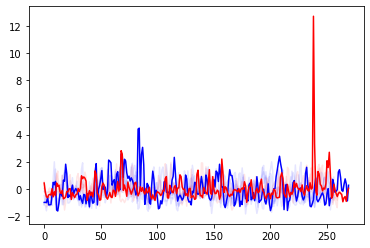

In [378]:
print(data[3]['9']['all'].shape)
print(data[8]['9']['all'].shape)

for i in range(data[3]['9']['all'].shape[0]):
    out3_9[i] = find_decayval_exp(data[3]['9']['all'][i,:,:],0.15)
for i in range(data[8]['9']['all'].shape[0]):    
    out8_9[i] = find_decayval_exp(data[8]['9']['all'][i,:,:],0.15)

out3_9_0_b = []
out3_9_1_b = []
out3_9_2_b = []
out3_9_3_b = []
out8_9_0_b = []
out8_9_1_b = []
out8_9_2_b = []
for j in range(data[3]['9']['all'].shape[1]):
    out3_9_0_b.append(list(out3_9[0].values())[j]['parms'][1])
    out3_9_1_b.append(list(out3_9[1].values())[j]['parms'][1])
    out3_9_2_b.append(list(out3_9[2].values())[j]['parms'][1])
    out3_9_3_b.append(list(out3_9[3].values())[j]['parms'][1])
    out8_9_0_b.append(list(out8_9[0].values())[j]['parms'][1])
    out8_9_1_b.append(list(out8_9[1].values())[j]['parms'][1])
    out8_9_2_b.append(list(out8_9[2].values())[j]['parms'][1])

ou1 = np.concatenate([np.array(out3_9_0_b).reshape(1,-1),np.array(out3_9_1_b).reshape(1,-1),np.array(out3_9_2_b).reshape(1,-1),np.array(out3_9_3_b).reshape(1,-1)],axis=0)
ou2 = np.concatenate([np.array(out8_9_0_b).reshape(1,-1),np.array(out8_9_1_b).reshape(1,-1),np.array(out8_9_2_b).reshape(1,-1)],axis=0)

print(ou1.shape)
print(ou2.shape)

std1=([i for i in out3_9_0_b if i < statistics.mean(out3_9_0_b)+2*statistics.stdev(out3_9_0_b)]-statistics.mean(out3_9_0_b))/statistics.stdev(out3_9_0_b)
std2=([i for i in out3_9_1_b if i < statistics.mean(out3_9_1_b)+2*statistics.stdev(out3_9_1_b)]-statistics.mean(out3_9_1_b))/statistics.stdev(out3_9_1_b)
std3=([i for i in out3_9_2_b if i < statistics.mean(out3_9_2_b)+2*statistics.stdev(out3_9_2_b)]-statistics.mean(out3_9_2_b))/statistics.stdev(out3_9_2_b)
std4=([i for i in out3_9_3_b if i < statistics.mean(out3_9_3_b)+2*statistics.stdev(out3_9_3_b)]-statistics.mean(out3_9_3_b))/statistics.stdev(out3_9_3_b)
std5=([i for i in out8_9_0_b if i < statistics.mean(out8_9_0_b)+2*statistics.stdev(out8_9_0_b)]-statistics.mean(out8_9_0_b))/statistics.stdev(out8_9_0_b)
std6=([i for i in out8_9_1_b if i < statistics.mean(out8_9_1_b)+2*statistics.stdev(out8_9_1_b)]-statistics.mean(out8_9_1_b))/statistics.stdev(out8_9_1_b)
std7=([i for i in out8_9_2_b if i < statistics.mean(out8_9_2_b)+2*statistics.stdev(out8_9_2_b)]-statistics.mean(out8_9_2_b))/statistics.stdev(out8_9_2_b)

std8=(np.median(ou1,axis=0)-statistics.mean(np.median(ou1,axis=0)))/statistics.stdev(np.median(ou1,axis=0))
std9=(np.median(ou2,axis=0)-statistics.mean(np.median(ou2,axis=0)))/statistics.stdev(np.median(ou2,axis=0))


plt.plot(std1,color='blue',alpha=0.1)
plt.plot(std2,color='blue',alpha=0.1)
plt.plot(std3,color='blue',alpha=0.1)
plt.plot(std4,color='blue',alpha=0.1)
plt.plot(std5,color='red',alpha=0.1)
plt.plot(std6,color='red',alpha=0.1)
plt.plot(std7,color='red',alpha=0.1)
plt.plot(std8,color = 'blue')
plt.plot(std9,color = 'red')

#plt.ylim(0,10)


subject4_compare = audio_vmPFC_compare(std8, std9)

In [489]:
#Form channels into one dataframe
Subject4_audio = pd.DataFrame({'channel1': out3_9_0_b, 'channel2': out3_9_1_b,'channel3': out3_9_2_b,'channel4': out3_9_3_b}, columns=['channel1', 'channel2','channel3','channel4'])
Subject4_vmpfc = pd.DataFrame({'channel1': out8_9_0_b, 'channel2': out8_9_1_b,'channel3': out8_9_2_b}, columns=['channel1', 'channel2','channel3'])

#Standardize the channels
Subject4_audio = StandardScaler().fit_transform(Subject4_audio)
Subject4_vmpfc = StandardScaler().fit_transform(Subject4_vmpfc)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Subject4_audio_components = pca.fit_transform(Subject4_audio)
principalDf_Subject4_audio = pd.DataFrame(data = Subject4_audio_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)

Subject4_vmpfc_components = pca.fit_transform(Subject4_vmpfc)
principalDf_Subject4_vmpfc = pd.DataFrame(data = Subject4_vmpfc_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)


s4pc_compare1 = audio_vmPFC_compare(principalDf_Subject4_audio.loc[:,'principal component 1'].values, Subject4_vmpfc[:,0])
s4pc_compare2 = audio_vmPFC_compare(principalDf_Subject4_audio.loc[:,'principal component 1'].values, Subject4_vmpfc[:,1])
s4pc_compare3 = audio_vmPFC_compare(principalDf_Subject4_audio.loc[:,'principal component 1'].values, Subject4_vmpfc[:,2])
s4pc_compare4 = audio_vmPFC_compare(principalDf_Subject4_audio.loc[:,'principal component 2'].values, Subject4_vmpfc[:,0])
s4pc_compare5 = audio_vmPFC_compare(principalDf_Subject4_audio.loc[:,'principal component 2'].values, Subject4_vmpfc[:,1])
s4pc_compare6 = audio_vmPFC_compare(principalDf_Subject4_audio.loc[:,'principal component 2'].values, Subject4_vmpfc[:,2])
s4pc_compare7 = audio_vmPFC_compare(principalDf_Subject4_audio.loc[:,'principal component 3'].values, Subject4_vmpfc[:,0])
s4pc_compare8 = audio_vmPFC_compare(principalDf_Subject4_audio.loc[:,'principal component 3'].values, Subject4_vmpfc[:,1])
s4pc_compare9 = audio_vmPFC_compare(principalDf_Subject4_audio.loc[:,'principal component 3'].values, Subject4_vmpfc[:,2])


s4all_compare = []
for i in range(len(s4pc_compare1)):
    if s4pc_compare1[i] + s4pc_compare2[i] + s4pc_compare3[i]+ s4pc_compare4[i]+ s4pc_compare5[i]+ s4pc_compare6[i]+ s4pc_compare7[i]+ s4pc_compare8[i]+ s4pc_compare9[i] >= 3:
        s4all_compare.append(1)
    elif s4pc_compare1[i] + s4pc_compare2[i] + s4pc_compare3[i]+ s4pc_compare4[i]+ s4pc_compare5[i]+ s4pc_compare6[i]+ s4pc_compare7[i]+ s4pc_compare8[i]+ s4pc_compare9[i] <= -3:
        s4all_compare.append(-1)
    else:
        s4all_compare.append(0)
print(s4all_compare)  
len(s4all_compare)


[0.6089648  0.14913992 0.14254438]
[0.55366518 0.30159845 0.14473637]
[1, -1, -1, -1, 1, 0, 0, 1, -1, -1, -1, 1, 1, 1, 1, 1, 0, -1, -1, -1, -1, -1, 1, 1, -1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 0, 0, 1, 0, 0, 1, -1, -1, -1, -1, -1, -1, -1, 1, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, 1, 1, 0, -1, -1, -1, -1, 0, -1, -1, 0, -1, 1, 1, 0, -1, -1, -1, 1, 1, 0, -1, 1, 0, 0, -1, -1, -1, -1, -1, 0, 0, 1, -1, -1, 0, 0, 0, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 0, 1, 1, 1, 1, 1, 0, -1, 0, 1, 1, 0, 0, -1, -1, -1, 1, 1, 1, 0, -1, -1, -1, 1, 0, -1, 0, 1, 0, 0, 1, 0, -1, -1, -1, -1, -1, -1, 1, 1, 0, -1, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, -1, -1, -1, 0, 1, 0, 1, -1, 0, 1, 1, 1, 1, 0, -1, -1, 0, 0, -1, 0, 1, 1, 0, -1, 0, -1, -1, -1, 0, -1, 1, 1, 1, 1, -1, -1, -1, -1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, -1, -1, -1, 0, 1, 0, 0, 0, -1, 0, 1, 1, -1, -1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, -1]


270

(5, 270, 650)
(3, 270, 650)
(5, 270)
(3, 270)


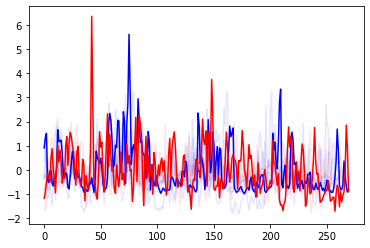

In [379]:
print(data[4]['9']['all'].shape)
print(data[9]['9']['all'].shape)

for i in range(data[4]['9']['all'].shape[0]):
    out4_9[i] = find_decayval_exp(data[4]['9']['all'][i,:,:],0.15)

for i in range(data[9]['9']['all'].shape[0]):    
    out9_9[i] = find_decayval_exp(data[9]['9']['all'][i,:,:],0.15)


out4_9_0_b = []
out4_9_1_b = []
out4_9_2_b = []
out4_9_3_b = []
out4_9_4_b = []
out9_9_0_b = []
out9_9_1_b = []
out9_9_2_b = []
for j in range(data[4]['9']['all'].shape[1]):
    out4_9_0_b.append(list(out4_9[0].values())[j]['parms'][1])
    out4_9_1_b.append(list(out4_9[1].values())[j]['parms'][1])
    out4_9_2_b.append(list(out4_9[2].values())[j]['parms'][1])
    out4_9_3_b.append(list(out4_9[3].values())[j]['parms'][1])
    out4_9_4_b.append(list(out4_9[4].values())[j]['parms'][1])
    out9_9_0_b.append(list(out9_9[0].values())[j]['parms'][1])
    out9_9_1_b.append(list(out9_9[1].values())[j]['parms'][1])
    out9_9_2_b.append(list(out9_9[2].values())[j]['parms'][1])

ou1 = np.concatenate([np.array(out4_9_0_b).reshape(1,-1),np.array(out4_9_1_b).reshape(1,-1),np.array(out4_9_2_b).reshape(1,-1),np.array(out4_9_3_b).reshape(1,-1),np.array(out4_9_4_b).reshape(1,-1)],axis=0)
ou2 = np.concatenate([np.array(out9_9_0_b).reshape(1,-1),np.array(out9_9_1_b).reshape(1,-1),np.array(out9_9_2_b).reshape(1,-1)],axis=0)

print(ou1.shape)
print(ou2.shape)

std1=([i for i in out4_9_0_b if i < statistics.mean(out4_9_0_b)+2*statistics.stdev(out4_9_0_b)]-statistics.mean(out4_9_0_b))/statistics.stdev(out4_9_0_b)
std2=([i for i in out4_9_1_b if i < statistics.mean(out4_9_1_b)+2*statistics.stdev(out4_9_1_b)]-statistics.mean(out4_9_1_b))/statistics.stdev(out4_9_1_b)
std3=([i for i in out4_9_2_b if i < statistics.mean(out4_9_2_b)+2*statistics.stdev(out4_9_2_b)]-statistics.mean(out4_9_2_b))/statistics.stdev(out4_9_2_b)
std4=([i for i in out4_9_3_b if i < statistics.mean(out4_9_3_b)+2*statistics.stdev(out4_9_3_b)]-statistics.mean(out4_9_3_b))/statistics.stdev(out4_9_1_b)
std5=([i for i in out4_9_4_b if i < statistics.mean(out4_9_4_b)+2*statistics.stdev(out4_9_4_b)]-statistics.mean(out4_9_4_b))/statistics.stdev(out4_9_4_b)
std6=([i for i in out9_9_0_b if i < statistics.mean(out9_9_0_b)+2*statistics.stdev(out9_9_0_b)]-statistics.mean(out9_9_0_b))/statistics.stdev(out9_9_0_b)
std7=([i for i in out9_9_1_b if i < statistics.mean(out9_9_1_b)+2*statistics.stdev(out9_9_1_b)]-statistics.mean(out9_9_1_b))/statistics.stdev(out9_9_1_b)
std8=([i for i in out9_9_2_b if i < statistics.mean(out9_9_2_b)+2*statistics.stdev(out9_9_2_b)]-statistics.mean(out9_9_2_b))/statistics.stdev(out9_9_2_b)
std9=(np.median(ou1,axis=0)-statistics.mean(np.median(ou1,axis=0)))/statistics.stdev(np.median(ou1,axis=0))
std10=(np.median(ou2,axis=0)-statistics.mean(np.median(ou2,axis=0)))/statistics.stdev(np.median(ou2,axis=0))


plt.plot(std1,color='blue',alpha=0.1)
plt.plot(std2,color='blue',alpha=0.1)
plt.plot(std3,color='blue',alpha=0.1)
plt.plot(std4,color='blue',alpha=0.1)
plt.plot(std5,color='blue',alpha=0.1)
plt.plot(std6,color='red',alpha=0.1)
plt.plot(std7,color='red',alpha=0.1)
plt.plot(std8,color='red',alpha=0.1)
plt.plot(std9,color = 'blue')
plt.plot(std10,color = 'red')

#plt.ylim(0,10)


subject5_compare = audio_vmPFC_compare(std9, std10)

In [493]:
#Form channels into one dataframe
Subject5_audio = pd.DataFrame({'channel1': out4_9_0_b, 'channel2': out4_9_1_b,'channel3': out4_9_2_b,'channel4': out4_9_3_b,'channel5': out4_9_4_b}, columns=['channel1', 'channel2','channel3','channel4','channel5'])
Subject5_vmpfc = pd.DataFrame({'channel1': out9_9_0_b, 'channel2': out9_9_1_b,'channel3': out9_9_2_b}, columns=['channel1', 'channel2','channel3'])

#Standardize the channels
Subject5_audio = StandardScaler().fit_transform(Subject5_audio)
Subject5_vmpfc = StandardScaler().fit_transform(Subject5_vmpfc)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Subject5_audio_components = pca.fit_transform(Subject5_audio)
principalDf_Subject5_audio = pd.DataFrame(data = Subject5_audio_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)

Subject5_vmpfc_components = pca.fit_transform(Subject5_vmpfc)
principalDf_Subject5_vmpfc = pd.DataFrame(data = Subject5_vmpfc_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_)


s5pc_compare1 = audio_vmPFC_compare(principalDf_Subject5_audio.loc[:,'principal component 1'].values, Subject5_vmpfc[:,0])
s5pc_compare2 = audio_vmPFC_compare(principalDf_Subject5_audio.loc[:,'principal component 1'].values, Subject5_vmpfc[:,1])
s5pc_compare3 = audio_vmPFC_compare(principalDf_Subject5_audio.loc[:,'principal component 1'].values, Subject5_vmpfc[:,2])
s5pc_compare4 = audio_vmPFC_compare(principalDf_Subject5_audio.loc[:,'principal component 2'].values, Subject5_vmpfc[:,0])
s5pc_compare5 = audio_vmPFC_compare(principalDf_Subject5_audio.loc[:,'principal component 2'].values, Subject5_vmpfc[:,1])
s5pc_compare6 = audio_vmPFC_compare(principalDf_Subject5_audio.loc[:,'principal component 2'].values, Subject5_vmpfc[:,2])
s5pc_compare7 = audio_vmPFC_compare(principalDf_Subject5_audio.loc[:,'principal component 3'].values, Subject5_vmpfc[:,0])
s5pc_compare8 = audio_vmPFC_compare(principalDf_Subject5_audio.loc[:,'principal component 3'].values, Subject5_vmpfc[:,1])
s5pc_compare9 = audio_vmPFC_compare(principalDf_Subject5_audio.loc[:,'principal component 3'].values, Subject5_vmpfc[:,2])


s5all_compare = []
for i in range(len(s5pc_compare1)):
    if s5pc_compare1[i] + s5pc_compare2[i] + s5pc_compare3[i]+ s5pc_compare4[i]+ s5pc_compare5[i]+ s5pc_compare6[i]+ s5pc_compare7[i]+ s5pc_compare8[i]+ s5pc_compare9[i] >= 3:
        s5all_compare.append(1)
    elif s5pc_compare1[i] + s5pc_compare2[i] + s5pc_compare3[i]+ s5pc_compare4[i]+ s5pc_compare5[i]+ s5pc_compare6[i]+ s5pc_compare7[i]+ s5pc_compare8[i]+ s5pc_compare9[i] <= -3:
        s5all_compare.append(-1)
    else:
        s5all_compare.append(0)
print(s5all_compare)  
len(s5all_compare)


[0.56967085 0.18272563 0.11909719]
[0.36867424 0.3343992  0.29692655]
[-1, -1, -1, -1, 0, -1, 0, 0, 0, 0, -1, 0, 1, 1, 0, -1, -1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, -1, 0, 0, 0, 0, -1, -1, -1, -1, -1, 0, 1, 1, 0, 1, -1, 1, 0, 1, 0, 1, 0, -1, 1, -1, 1, -1, 0, -1, -1, -1, -1, 0, -1, 0, 0, 1, 1, 0, 0, 0, 0, -1, -1, 0, -1, -1, -1, -1, 0, 1, 1, 0, 1, 1, 0, -1, -1, -1, 1, 0, -1, -1, 1, 0, -1, 0, 0, 0, -1, 0, 1, 0, 0, 1, 0, -1, -1, -1, 0, 1, 0, 1, 1, 1, 0, -1, -1, -1, -1, -1, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 1, 1, 0, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, 0, 0, -1, -1, -1, 1, 1, 1, 1, 0, -1, -1, 0, -1, 0, 0, -1, 1, 1, -1, -1, 0, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 0, 0, 0, -1, -1, -1, -1, -1, 0, 1, 0, 0, 0, -1, -1, -1, -1, 0, 0, -1, 1, 1, -1, 0, 0, 0, 0, -1, -1, -1, 0, 1, 1, 0, 0, 0, -1, 0, -1, -1, -1, -1, -1, 0, 1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 1, 0, -1, 0, 0, -1, 1, 1, -1]


270

In [407]:

audio_s_v = []
audio_l_v = []
for i in range(len(subject1_compare)):
    if subject1_compare[i]+subject2_compare[i]+subject3_compare[i]+subject4_compare[i]+subject5_compare[i] >= 3:
        audio_s_v.append(i)
    if subject1_compare[i]+subject2_compare[i]+subject3_compare[i]+subject4_compare[i]+subject5_compare[i] <= -3:
        audio_l_v.append(i)
        
    

In [408]:
len(audio_s_v)
len(audio_l_v)
print(audio_s_v)
print(audio_l_v)

[4, 19, 20, 21, 24, 25, 27, 34, 37, 42, 44, 45, 53, 67, 68, 69, 72, 93, 94, 103, 104, 105, 107, 111, 112, 120, 121, 123, 128, 131, 132, 133, 135, 142, 143, 149, 157, 159, 161, 168, 169, 170, 171, 173, 174, 177, 180, 183, 190, 194, 195, 196, 199, 200, 216, 217, 218, 223, 224, 225, 237, 238, 239, 242]
[16, 17, 28, 29, 40, 48, 49, 56, 57, 58, 59, 61, 64, 65, 66, 71, 76, 77, 78, 79, 86, 92, 96, 99, 125, 126, 139, 140, 144, 145, 152, 153, 154, 163, 164, 165, 166, 167, 179, 188, 193, 202, 203, 204, 205, 206, 209, 210, 214, 219, 220, 226, 233, 245, 247, 248, 249, 250, 256, 260, 263, 264, 265, 266, 267, 269]


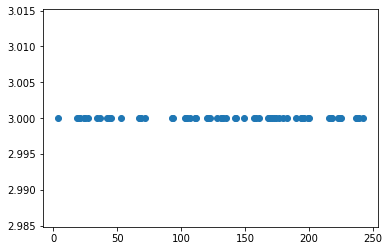

In [414]:
plt.scatter(audio_s_v,np.repeat(3,len(audio_s_v)))

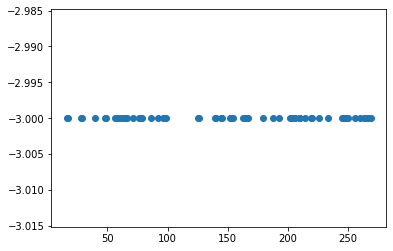

In [412]:
plt.scatter(audio_l_v,np.repeat(-3,len(audio_l_v)))

In [506]:
audio_s_v = []
audio_l_v = []
for i in range(len(s1all_compare)):
    if s1all_compare[i]+s2all_compare[i]+s3all_compare[i]+s4all_compare[i]+s5all_compare[i] >= 3:
        audio_s_v.append(i)
    if s1all_compare[i]+s2all_compare[i]+s3all_compare[i]+s4all_compare[i]+s5all_compare[i] <= -3:
        audio_l_v.append(i)
print(audio_s_v)   
print(audio_l_v) 

[4, 26, 44, 56, 68, 69, 87, 94, 111, 123, 128, 149, 161, 170, 180, 181, 223, 224, 225, 237, 238, 239, 242]
[1, 2, 38, 39, 52, 53, 58, 59, 60, 61, 64, 76, 85, 89, 95, 99, 109, 116, 119, 126, 137, 138, 139, 144, 145, 152, 186, 226, 257, 260, 266, 269]


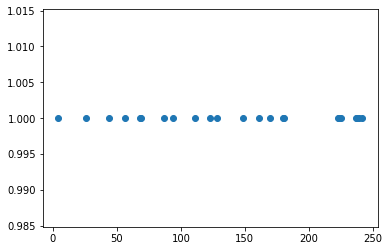

In [507]:
plt.scatter(audio_s_v,np.repeat(1,len(audio_s_v)))

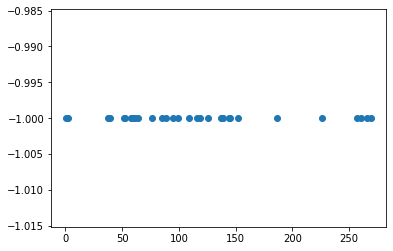

In [508]:
plt.scatter(audio_l_v,np.repeat(-1,len(audio_l_v)))